## Load packages and parameter configuration

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("fivethirtyeight")

start_date = '2013-01-02' # Data start date (inclusive)
end_date = '2019-01-01' # Data end date (exclusive)
path = f'./data/VTI_{start_date}_{end_date}' # Path of downloaded data file

## Load data

In [2]:
data = pd.read_csv(f'{path}/VTI.csv')
data['Date'] = pd.to_datetime(data['Date']) # Convert to datetime
data['Month'] = data['Date'].dt.month
data['DayOfMonth'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek

data.head()

,Date,Open,High,Low,Close,AdjClose,Volume,Month,DayOfMonth,DayOfWeek
0,2013-01-02,74.529999,75.150002,74.500000,75.139999,62.719402,5037200,1,2,2
1,2013-01-03,75.120003,75.370003,74.839996,75.029999,62.627575,2634600,1,3,3
2,2013-01-04,75.139999,75.519997,74.989998,75.410004,62.944786,2512900,1,4,4
3,2013-01-07,75.180000,75.279999,74.949997,75.209999,62.777840,2511200,1,7,0
4,2013-01-08,75.110001,75.180000,74.699997,75.010002,62.610920,1407900,1,8,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1510 entries, 0 to 1509
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        1510 non-null   datetime64[ns]
 1   Open        1510 non-null   float64       
 2   High        1510 non-null   float64       
 3   Low         1510 non-null   float64       
 4   Close       1510 non-null   float64       
 5   AdjClose    1510 non-null   float64       
 6   Volume      1510 non-null   int64         
 7   Month       1510 non-null   int64         
 8   DayOfMonth  1510 non-null   int64         
 9   DayOfWeek   1510 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(4)
memory usage: 118.1 KB


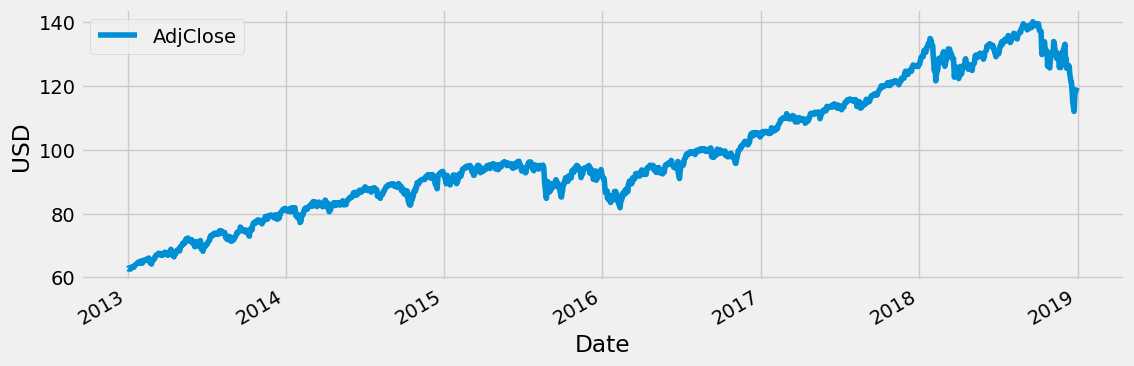

In [4]:
fig, ax = plt.subplots(figsize=(12,4))

data.plot(x='Date', y='AdjClose', ax=ax)
ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.show()

### Average AdjClose by Month
On average, later months have a higher value than earlier months.

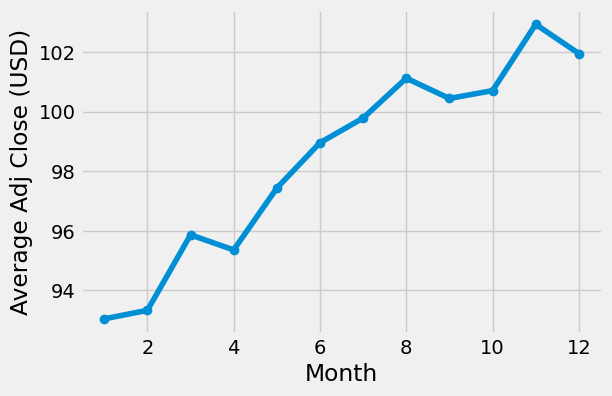

In [5]:
temp = pd.DataFrame(data.groupby(['Month'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['Month'], temp['AdjClose'], '-o')
ax.set_xlabel('Month')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

### Average AdjClose by DayOfWeek
On average, Thursday and Friday have higher price than other days of week.

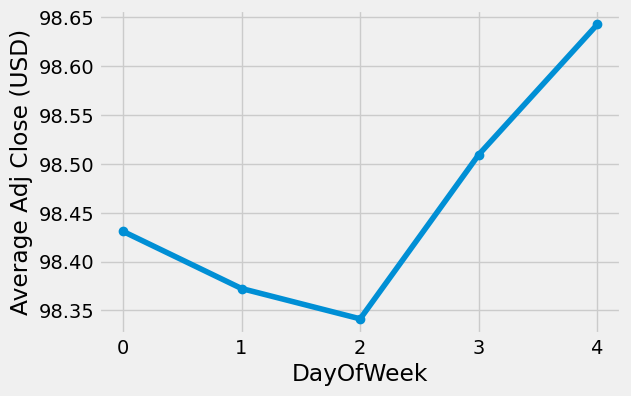

In [6]:
temp = pd.DataFrame(data.groupby(['DayOfWeek'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['DayOfWeek'], temp['AdjClose'], '-o')
ax.set_xlabel('DayOfWeek')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

A slight upward trend.

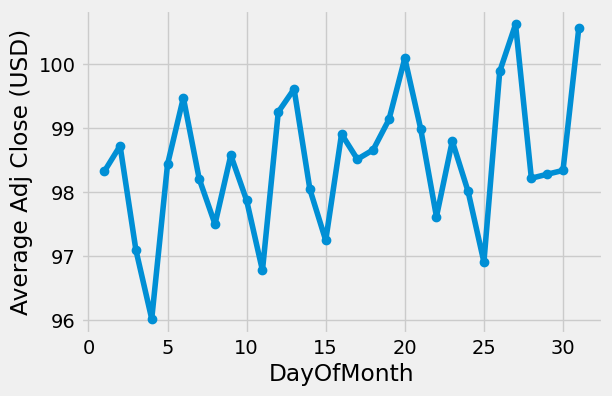

In [7]:
temp = pd.DataFrame(data.groupby(['DayOfMonth'])['AdjClose'].mean()).reset_index()

fig, ax = plt.subplots(figsize=(6,4))

ax.plot(temp['DayOfMonth'], temp['AdjClose'], '-o')
ax.set_xlabel('DayOfMonth')
ax.set_ylabel('Average Adj Close (USD)')

plt.show()

## Feature engineering

- Difference of high and low
- Difference of open and close
- Lag N days: AdjClose, Volume, Diff_HighLow, Diff_OpenClose

In [8]:
# Create new columns
data['Diff_HighLow'] = data['High']-data['Low']
data['Diff_OpenClose'] = data['Open']-data['Close']

# Drop the ones not needed
data.drop(['High','Low'], axis=1, inplace=True)
data.drop(['Open','Close'], axis=1, inplace=True)

data.head()

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose
0,2013-01-02,62.719402,5037200,1,2,2,0.650002,-0.610001
1,2013-01-03,62.627575,2634600,1,3,3,0.530006,0.090004
2,2013-01-04,62.944786,2512900,1,4,4,0.529999,-0.270004
3,2013-01-07,62.777840,2511200,1,7,0,0.330002,-0.029999
4,2013-01-08,62.610920,1407900,1,8,1,0.480003,0.099998


In [9]:
N = 3 # for feature at day t, we use lags from t-1, t-2, ..., t-N as features

In [10]:
data_lags = data.copy()

for i in range(1, N+1):
    data_lags[f"AdjClose_Lag{str(i)}"] = data_lags['AdjClose'].shift(i) # lag i day
    data_lags[f"Diff_HighLow_Lag{str(i)}"] = data_lags['Diff_HighLow'].shift(i) # lag i day
    data_lags[f"Diff_OpenClose_Lag{str(i)}"] = data_lags['Diff_OpenClose'].shift(i) # lag i day
    data_lags[f"Volume_Lag{str(i)}"] = data_lags['Volume'].shift(i) # lag i day

In [11]:
data_lags.head(10)

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose,AdjClose_Lag1,Diff_HighLow_Lag1,Diff_OpenClose_Lag1,Volume_Lag1,AdjClose_Lag2,Diff_HighLow_Lag2,Diff_OpenClose_Lag2,Volume_Lag2,AdjClose_Lag3,Diff_HighLow_Lag3,Diff_OpenClose_Lag3,Volume_Lag3
0,2013-01-02,62.719402,5037200,1,2,2,0.650002,-0.610001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-01-03,62.627575,2634600,1,3,3,0.530006,0.090004,62.719402,0.650002,-0.610001,5037200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2013-01-04,62.944786,2512900,1,4,4,0.529999,-0.270004,62.627575,0.530006,0.090004,2634600.0,62.719402,0.650002,-0.610001,5037200.0,NaN,NaN,NaN,NaN
3,2013-01-07,62.777840,2511200,1,7,0,0.330002,-0.029999,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0,62.719402,0.650002,-0.610001,5037200.0
4,2013-01-08,62.610920,1407900,1,8,1,0.480003,0.099998,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0
5,2013-01-09,62.802864,1421900,1,9,2,0.300003,-0.049995,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0
6,2013-01-10,63.236900,1403700,1,10,3,0.549995,-0.139999,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0
7,2013-01-11,63.245262,1248500,1,11,4,0.290001,-0.009995,63.236900,0.549995,-0.139999,1403700.0,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0
8,2013-01-14,63.178497,2745100,1,14,0,0.360001,0.059998,63.245262,0.290001,-0.009995,1248500.0,63.236900,0.549995,-0.139999,1403700.0,62.802864,0.300003,-0.049995,1421900.0
9,2013-01-15,63.295349,1109100,1,15,1,0.550003,-0.430000,63.178497,0.360001,0.059998,2745100.0,63.245262,0.290001,-0.009995,1248500.0,63.236900,0.549995,-0.139999,1403700.0


In [12]:
data_lags = data_lags.iloc[3:,:] # Remove the first 2 days without lag

In [13]:
data_lags.head()

,Date,AdjClose,Volume,Month,DayOfMonth,DayOfWeek,Diff_HighLow,Diff_OpenClose,AdjClose_Lag1,Diff_HighLow_Lag1,Diff_OpenClose_Lag1,Volume_Lag1,AdjClose_Lag2,Diff_HighLow_Lag2,Diff_OpenClose_Lag2,Volume_Lag2,AdjClose_Lag3,Diff_HighLow_Lag3,Diff_OpenClose_Lag3,Volume_Lag3
3,2013-01-07,62.777840,2511200,1,7,0,0.330002,-0.029999,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0,62.719402,0.650002,-0.610001,5037200.0
4,2013-01-08,62.610920,1407900,1,8,1,0.480003,0.099998,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0
5,2013-01-09,62.802864,1421900,1,9,2,0.300003,-0.049995,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0
6,2013-01-10,63.236900,1403700,1,10,3,0.549995,-0.139999,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0
7,2013-01-11,63.245262,1248500,1,11,4,0.290001,-0.009995,63.236900,0.549995,-0.139999,1403700.0,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0


## Train, validation, test split

In [14]:
test_size = 0.2 # proportion of dataset to be used as test set
cv_size = 0.2 # proportion of dataset to be used as cross-validation set

In [15]:
nrows = data_lags.shape[0]
nrows_cv = int(cv_size*nrows)
nrows_test = int(test_size*nrows)
nrows_train = nrows-nrows_cv-nrows_test

In [16]:
# Split into train, cv, test dataframes
df_train = data_lags[:nrows_train]
df_cv = data_lags[nrows_train:nrows_train+nrows_cv]
df_test = data_lags[nrows_train+nrows_cv:]

In [17]:
features = ['AdjClose_Lag1', 'Diff_HighLow_Lag1', 'Diff_OpenClose_Lag1', 'Volume_Lag1', 
            'AdjClose_Lag2', 'Diff_HighLow_Lag2', 'Diff_OpenClose_Lag2', 'Volume_Lag2',
            'AdjClose_Lag3', 'Diff_HighLow_Lag3', 'Diff_OpenClose_Lag3', 'Volume_Lag3']
target = 'AdjClose'

In [18]:
# Split into X and y
X_train = df_train[features]
y_train = df_train[target]

X_cv = df_cv[features]
y_cv = df_cv[target]

X_test = df_test[features]
y_test = df_test[target]

In [19]:
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")

print(f"X_cv shape: {X_cv.shape}")
print(f"y_cv shape: {y_cv.shape}")

print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (905, 12)
y_train shape: (905,)
X_cv shape: (301, 12)
y_cv shape: (301,)
X_test shape: (301, 12)
y_test shape: (301,)


In [20]:
X_train.head()

,AdjClose_Lag1,Diff_HighLow_Lag1,Diff_OpenClose_Lag1,Volume_Lag1,AdjClose_Lag2,Diff_HighLow_Lag2,Diff_OpenClose_Lag2,Volume_Lag2,AdjClose_Lag3,Diff_HighLow_Lag3,Diff_OpenClose_Lag3,Volume_Lag3
3,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0,62.719402,0.650002,-0.610001,5037200.0
4,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0,62.627575,0.530006,0.090004,2634600.0
5,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0,62.944786,0.529999,-0.270004,2512900.0
6,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0,62.777840,0.330002,-0.029999,2511200.0
7,63.236900,0.549995,-0.139999,1403700.0,62.802864,0.300003,-0.049995,1421900.0,62.610920,0.480003,0.099998,1407900.0


- The first 905 days data will be used to train model.
- The middle 301 days data will be used to tune model.
- The last 301 days data will be used as test set.

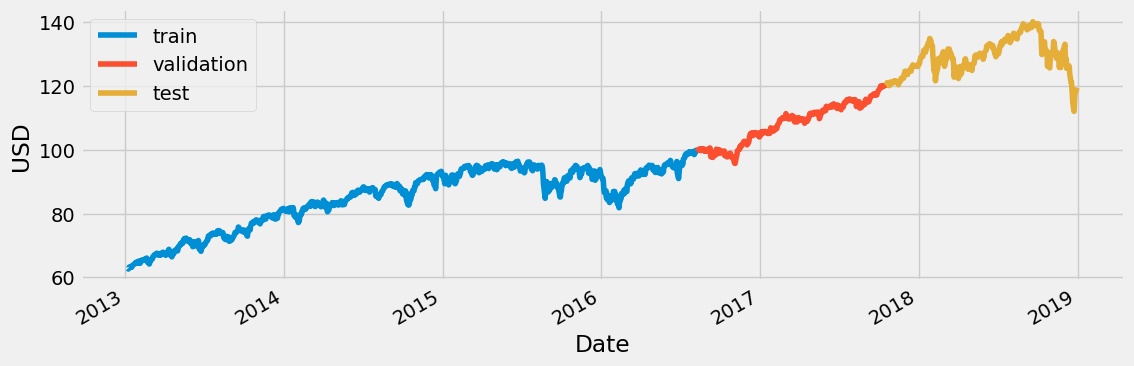

In [21]:
fig, ax = plt.subplots(figsize=(12,4))

df_train.plot(x='Date', y='AdjClose', ax=ax)
df_cv.plot(x='Date', y='AdjClose', ax=ax)
df_test.plot(x='Date', y='AdjClose', ax=ax)

ax.legend(['train','validation','test'])
ax.set_xlabel('Date')
ax.set_ylabel('USD')

plt.show()

## Write to csv

In [22]:
X_train.to_csv(f"{path}/X_train.csv", index=False)
y_train.to_csv(f"{path}/y_train.csv", index=False)

X_cv.to_csv(f"{path}/X_cv.csv", index=False)
y_cv.to_csv(f"{path}/y_cv.csv", index=False)

X_test.to_csv(f"{path}/X_test.csv", index=False)
y_test.to_csv(f"{path}/y_test.csv", index=False)

In [23]:
df_train.to_csv(f"{path}/df_train.csv", index=False)
df_cv.to_csv(f"{path}/df_cv.csv", index=False)
df_test.to_csv(f"{path}/df_test.csv", index=False)